<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/unconve/homework%204/homework4_unconve_geomech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3. Flow Mechanism and Permeability**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 387 (delta 52), reused 0 (delta 0), pack-reused 279
Receiving objects: 100% (387/387), 24.90 MiB | 37.67 MiB/s, done.
Resolving deltas: 100% (179/179), done.


## Part 1. Pressure-dependent Permeability

High pressure curve (1000-4000 psi)

Calculate:
* Change of log k to change of Pp (pore pressure) at constant Pc (confining pressure)

$$(\frac{\partial log(k)}{\partial Pp})_{4000<Pc<6000}$$

* Change of log k to change of Pc at constant Pp

$$(\frac{\partial log(k)}{\partial Pc})_{1000<Pp<4000}$$

* Effective stress coefficient

$$\chi = -(\frac{|\partial log(k)/\partial Pp|_{Pc}}{|\partial log(k)/\partial Pc|_{Pp}})$$

In [56]:
# Permeability data for pore pressure range 250 to 750 psi
perm1 = np.loadtxt('/content/reservoir-geomechanics/unconve/homework 4/Permeability data Pp 250-750 psi.txt', skiprows=1)

# Permeability data for pore pressure range 1000 to 4000 psi
perm2 = np.loadtxt('/content/reservoir-geomechanics/unconve/homework 4/Permeability data Pp 1000-4000 psi.txt', skiprows=1)

# take logarithmic of k
log_k1 = np.log10(perm1[:,2])
log_k2 = np.log10(perm2[:,2])

perm1 = pd.DataFrame({'Pp': perm1[:,0], 'Pc': perm1[:,1], 'k': perm1[:,2], 'log_k': log_k1})
perm2 = pd.DataFrame({'Pp': perm2[:,0], 'Pc': perm2[:,1], 'k': perm2[:,2], 'log_k': log_k2})
perm2

,Pp,Pc,k,log_k
0,1000.0,2000.0,40.234177,1.604595
1,1000.0,3000.0,23.280851,1.366999
2,1000.0,4000.0,11.917827,1.076197
3,1000.0,5000.0,5.479152,0.738713
4,2000.0,3000.0,28.033594,1.447679
5,2000.0,4000.0,16.847878,1.226545
6,2000.0,5000.0,10.143126,1.006172
7,2000.0,6000.0,5.035496,0.702042
8,3000.0,4000.0,22.044199,1.343294
9,3000.0,5000.0,10.015574,1.000676


In [63]:
# calculate partial log k / partial Pp for Pc=4000, 5000, 6000

Pc4000 = perm2.loc[perm2['Pc'] == 4000]
logk_Pc4000 = np.array(Pc4000['log_k']); Pp_Pc4000 = np.array(Pc4000['Pp'])
div_Pc4000 = np.array([j-i for i, j in zip(logk_Pc4000[:-1], logk_Pc4000[1:])]) / np.array([j-i for i, j in zip(Pp_Pc4000[:-1], Pp_Pc4000[1:])])
print('div_Pc4000:', div_Pc4000)

Pc5000 = perm2.loc[perm2['Pc'] == 5000]
logk_Pc5000 = np.array(Pc5000['log_k']); Pp_Pc5000 = np.array(Pc5000['Pp'])
div_Pc5000 = np.array([j-i for i, j in zip(logk_Pc5000[:-1], logk_Pc5000[1:])]) / np.array([j-i for i, j in zip(Pp_Pc5000[:-1], Pp_Pc5000[1:])])
print('div_Pc5000:', div_Pc5000)

Pc6000 = perm2.loc[perm2['Pc'] == 6000]
logk_Pc6000 = np.array(Pc6000['log_k']); Pp_Pc6000 = np.array(Pc6000['Pp'])
div_Pc6000 = np.array([j-i for i, j in zip(logk_Pc6000[:-1], logk_Pc6000[1:])]) / np.array([j-i for i, j in zip(Pp_Pc6000[:-1], Pp_Pc6000[1:])])
print('div_Pc6000:', div_Pc6000)

# calculate partial log k / partial Pc for Pp=1000, 2000, 3000, 4000

Pp1000 = perm2.loc[perm2['Pp'] == 1000]
logk_Pp1000 = np.array(Pp1000['log_k']); Pc_Pp1000 = np.array(Pp1000['Pc'])
div_Pp1000 = np.array([j-i for i, j in zip(logk_Pp1000[:-1], logk_Pp1000[1:])]) / np.array([j-i for i, j in zip(Pc_Pp1000[:-1], Pc_Pp1000[1:])])
print('div_Pp1000:', div_Pp1000)

Pp2000 = perm2.loc[perm2['Pp'] == 2000]
logk_Pp2000 = np.array(Pp2000['log_k']); Pc_Pp2000 = np.array(Pp2000['Pc'])
div_Pp2000 = np.array([j-i for i, j in zip(logk_Pp2000[:-1], logk_Pp2000[1:])]) / np.array([j-i for i, j in zip(Pc_Pp2000[:-1], Pc_Pp2000[1:])])
print('div_Pp2000:', div_Pp2000)

Pp3000 = perm2.loc[perm2['Pp'] == 3000]
logk_Pp3000 = np.array(Pp3000['log_k']); Pc_Pp3000 = np.array(Pp3000['Pc'])
div_Pp3000 = np.array([j-i for i, j in zip(logk_Pp3000[:-1], logk_Pp3000[1:])]) / np.array([j-i for i, j in zip(Pc_Pp3000[:-1], Pc_Pp3000[1:])])
print('div_Pp3000:', div_Pp3000)

Pp4000 = perm2.loc[perm2['Pp'] == 4000]
logk_Pp4000 = np.array(Pp4000['log_k']); Pc_Pp4000 = np.array(Pp4000['Pc'])
div_Pp4000 = np.array([j-i for i, j in zip(logk_Pp4000[:-1], logk_Pp4000[1:])]) / np.array([j-i for i, j in zip(Pc_Pp4000[:-1], Pc_Pp4000[1:])])
print('div_Pp4000:', div_Pp4000)

average_div_Pc = np.average(np.concatenate([div_Pc4000, div_Pc5000, div_Pc6000]))
print('Average of do(k)/do(Pp) at constant Pc:', average_div_Pc)
average_div_Pp = np.average(np.concatenate([div_Pp1000, div_Pp2000, div_Pp3000, div_Pp4000]))
print('Average of do(k)/do(Pc) at constant Pp:', average_div_Pp)

X = -average_div_Pc / average_div_Pp
print('Effective stress constant chi:', X)

div_Pc4000: [0.00015035 0.00011675]
div_Pc5000: [ 2.67458472e-04 -5.49597633e-06  1.20407163e-04]
div_Pc6000: [8.05371090e-05 9.82426807e-06]
div_Pp1000: [-0.0002376  -0.0002908  -0.00033748]
div_Pp2000: [-0.00022113 -0.00022037 -0.00030413]
div_Pp3000: [-0.00034262 -0.0002181  -0.00016472]
div_Pp4000: [-0.00032868 -0.00016479 -0.00012022]
Average of do(k)/do(Pp) at constant Pc: 0.00010568975457593109
Average of do(k)/do(Pc) at constant Pp: -0.0002458873305322805
Effective stress constant chi: 0.4298300133932926


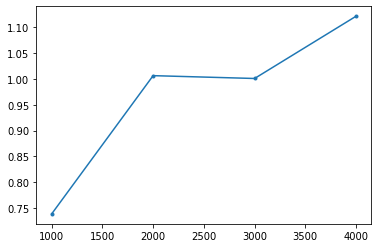

In [58]:
plt.plot(Pp_Pc5000, logk_Pc5000, '.-')

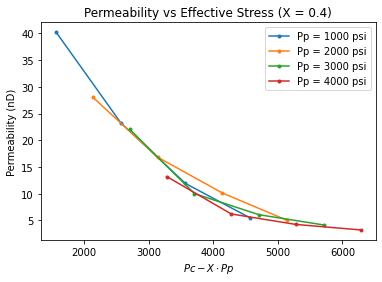

In [64]:
# X = 0.4

Pc_min_Pp1000 = np.array(Pp1000['Pc'] - (X * Pp1000['Pp']))
Pc_min_Pp2000 = np.array(Pp2000['Pc'] - (X * Pp2000['Pp']))
Pc_min_Pp3000 = np.array(Pp3000['Pc'] - (X * Pp3000['Pp']))
Pc_min_Pp4000 = np.array(Pp4000['Pc'] - (X * Pp4000['Pp']))

p1 = plt.plot(Pc_min_Pp1000, np.array(Pp1000['k']), '.-')
p2 = plt.plot(Pc_min_Pp2000, np.array(Pp2000['k']), '.-')
p3 = plt.plot(Pc_min_Pp3000, np.array(Pp3000['k']), '.-')
p4 = plt.plot(Pc_min_Pp4000, np.array(Pp4000['k']), '.-')
plt.legend([p1[0], p2[0], p3[0], p4[0]], ['Pp = 1000 psi', 'Pp = 2000 psi', 'Pp = 3000 psi', 'Pp = 4000 psi'])
plt.title('Permeability vs Effective Stress (X = 0.4)')
plt.xlabel('$Pc-X \cdot Pp$')
plt.ylabel('Permeability (nD)')
plt.show()

## Part 2. The Klinkenberg Effect

Low pressure curve (250-750 psi)

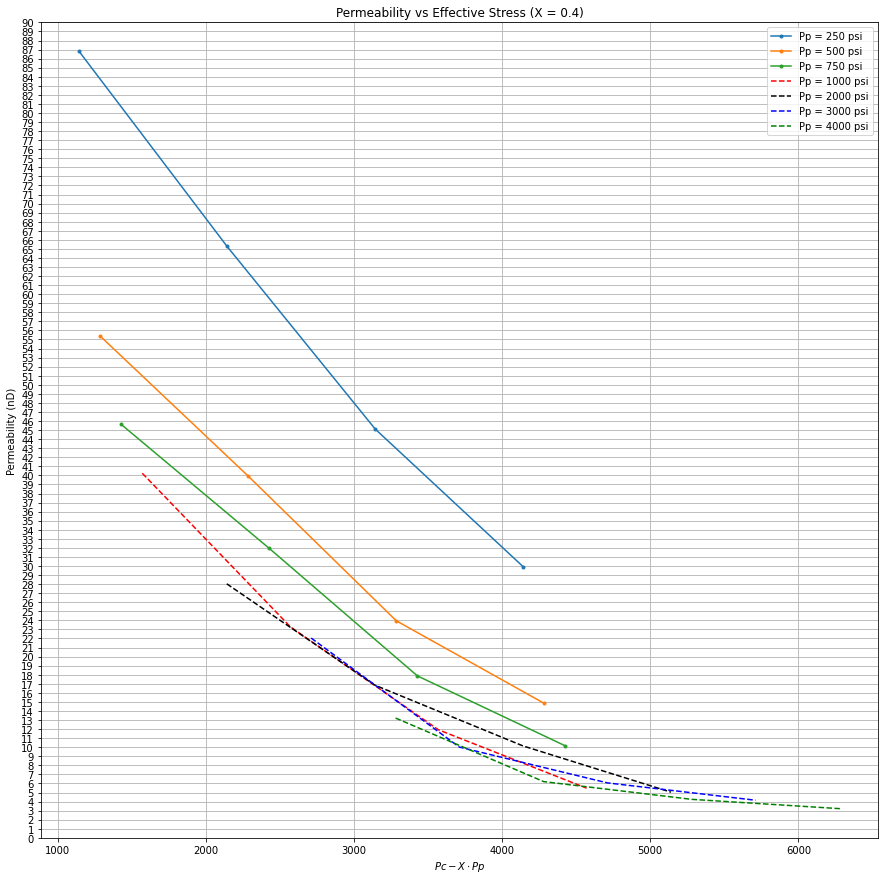

In [70]:
Pp250 = perm1.loc[perm1['Pp'] == 250]
k_Pp250 = np.array(Pp250['k'])
Pc_min_Pp250 = np.array(Pp250['Pc'] - (X * Pp250['Pp']))

Pp500 = perm1.loc[perm1['Pp'] == 500]
k_Pp500 = np.array(Pp500['k'])
Pc_min_Pp500 = np.array(Pp500['Pc'] - (X * Pp500['Pp']))

Pp750 = perm1.loc[perm1['Pp'] == 750]
k_Pp750 = np.array(Pp750['k'])
Pc_min_Pp750 = np.array(Pp750['Pc'] - (X * Pp750['Pp']))

plt.figure(figsize=(15,15))

p1 = plt.plot(Pc_min_Pp250, k_Pp250, '.-')
p2 = plt.plot(Pc_min_Pp500, k_Pp500, '.-')
p3 = plt.plot(Pc_min_Pp750, k_Pp750, '.-')

p4 = plt.plot(Pc_min_Pp1000, np.array(Pp1000['k']), '--', color='red')
p5 = plt.plot(Pc_min_Pp2000, np.array(Pp2000['k']), '--', color='black')
p6 = plt.plot(Pc_min_Pp3000, np.array(Pp3000['k']), '--', color='blue')
p7 = plt.plot(Pc_min_Pp4000, np.array(Pp4000['k']), '--', color='green')

plt.legend([p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]], ['Pp = 250 psi', 'Pp = 500 psi', 'Pp = 750 psi', 
                                                               'Pp = 1000 psi', 'Pp = 2000 psi', 'Pp = 3000 psi', 'Pp = 4000 psi'])
plt.title('Permeability vs Effective Stress (X = 0.4)')
plt.xlabel('$Pc-X \cdot Pp$')
plt.ylabel('Permeability (nD)')
plt.ylim(0, 90)

# grid spacing
grid_space_y = np.linspace(0, 90, 91)
plt.yticks(grid_space_y)

plt.grid('True')
plt.show()

### A. Plot the permeability data at each eﬀective stress as a function of inverse pore pressure

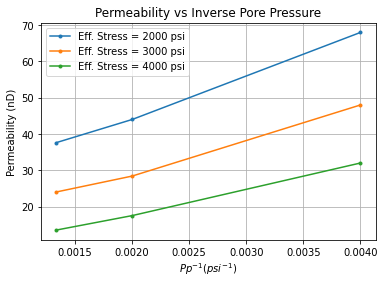

In [66]:
# determine k at each Pp (250, 500, 750) and each effective stress (2000, 3000, 4000)

# inverse of Pp
Pp_inv_1 = 1 / 250; Pp_inv_2 = 1 / 500; Pp_inv_3 = 1 / 750
Pp_inv = np.array([Pp_inv_1, Pp_inv_2, Pp_inv_3])

# eff 2000 (0.4: 68.5, 44.5, 38)
k_eff2000_Pp250 = 68; k_eff2000_Pp500 = 44; k_eff2000_Pp750 = 37.6
k_eff2000 = np.array([k_eff2000_Pp250, k_eff2000_Pp500, k_eff2000_Pp750])
# eff 3000 (0.4: 48, 28.7, 24.3)
k_eff3000_Pp250 = 48; k_eff3000_Pp500 = 28.4; k_eff3000_Pp750 = 24
k_eff3000 = np.array([k_eff3000_Pp250, k_eff3000_Pp500, k_eff3000_Pp750])
# eff 4000 (0.4: 32.3, 17.5, 13.5)
k_eff4000_Pp250 = 32; k_eff4000_Pp500 = 17.5; k_eff4000_Pp750 = 13.5
k_eff4000 = np.array([k_eff4000_Pp250, k_eff4000_Pp500, k_eff4000_Pp750])

# plot k vs inverse Pp
p1 = plt.plot(Pp_inv, k_eff2000, '.-')
p2 = plt.plot(Pp_inv, k_eff3000, '.-')
p3 = plt.plot(Pp_inv, k_eff4000, '.-')
plt.title('Permeability vs Inverse Pore Pressure')
plt.legend([p1[0], p2[0], p3[0]], ['Eff. Stress = 2000 psi', 'Eff. Stress = 3000 psi', 'Eff. Stress = 4000 psi'])
plt.xlabel('$Pp^{-1} (psi^{-1})$')
plt.ylabel('Permeability (nD)')
plt.grid('True')
plt.show()

### B. Find the value of the permeability at inﬁnite pore pressure $(k_{\infty})$ and Klinkenberg correction factor $(K_b)$

$$k_a=k_{\infty}[1+(Kb \cdot Pp^{-1})]$$

Permeability at infinite pore pressure (k_infinite) at 2000 psi effective stress: 21.66153848342078 nD, and Klinkenberg correction factor (Kb): 532.6704537514858 psi
Permeability at infinite pore pressure (k_infinite) at 3000 psi effective stress: 11.015384631244682 nD, and Klinkenberg correction factor (Kb): 833.7988810508397 psi
Permeability at infinite pore pressure (k_infinite) at 4000 psi effective stress: 3.865384613309115 nD, and Klinkenberg correction factor (Kb): 1813.4328370142694 psi 



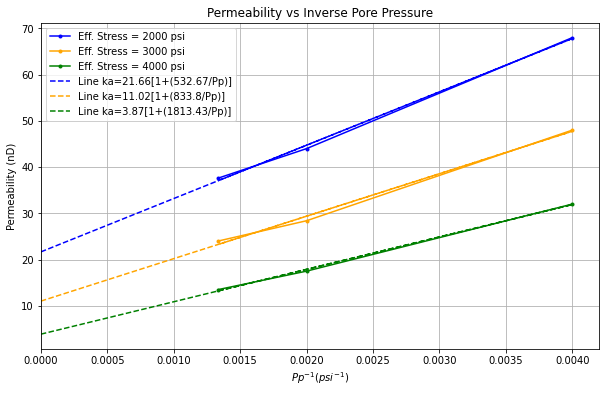

In [67]:
# function to fit
def klinkenberg(Pp_inv, k_inf, Kb):
  ka = k_inf * (1 + (Kb * Pp_inv))
  return(ka)

# fitting to line eff stress 2000 psi
from scipy.optimize import curve_fit

popt, pcov = curve_fit(klinkenberg, Pp_inv, k_eff2000)
print('Permeability at infinite pore pressure (k_infinite) at 2000 psi effective stress:', popt[0], 'nD, and Klinkenberg correction factor (Kb):', popt[1],'psi')

# fitting to line eff stress 3000 psi
popt1, pcov1 = curve_fit(klinkenberg, Pp_inv, k_eff3000)
print('Permeability at infinite pore pressure (k_infinite) at 3000 psi effective stress:', popt1[0], 'nD, and Klinkenberg correction factor (Kb):', popt1[1],'psi')

# fitting to line eff stress 4000 psi
popt2, pcov2 = curve_fit(klinkenberg, Pp_inv, k_eff4000)
print('Permeability at infinite pore pressure (k_infinite) at 4000 psi effective stress:', popt2[0], 'nD, and Klinkenberg correction factor (Kb):', popt2[1],'psi \n')

plt.figure(figsize=(10,6))

p1 = plt.plot(Pp_inv, k_eff2000, '.-', color='blue')
p2 = plt.plot(Pp_inv, k_eff3000, '.-', color='orange')
p3 = plt.plot(Pp_inv, k_eff4000, '.-', color='green')

# plot the fitted Klinkenberg
Pp_inv = np.concatenate([[0], Pp_inv], axis=0) # add 0 to get the y-intercept later in the plot
ka_fit_2000 = popt[0] * (1 + (popt[1] * Pp_inv))
pfit1 = plt.plot(Pp_inv, ka_fit_2000, '--', color='blue')

Pp_inv = np.concatenate([[0], Pp_inv], axis=0) # add 0 to get the y-intercept later in the plot
ka_fit_3000 = popt1[0] * (1 + (popt1[1] * Pp_inv))
pfit2 = plt.plot(Pp_inv, ka_fit_3000, '--', color='orange')

Pp_inv = np.concatenate([[0], Pp_inv], axis=0) # add 0 to get the y-intercept later in the plot
ka_fit_4000 = popt2[0] * (1 + (popt2[1] * Pp_inv))
pfit3 = plt.plot(Pp_inv, ka_fit_4000, '--', color='green')

plt.title('Permeability vs Inverse Pore Pressure')
plt.legend([p1[0], p2[0], p3[0], pfit1[0], pfit2[0], pfit3[0]], ['Eff. Stress = 2000 psi', 'Eff. Stress = 3000 psi', 'Eff. Stress = 4000 psi', 
                                                                 'Line ka={}[1+({}/Pp)]'.format(np.round(popt[0], 2), np.round(popt[1], 2)), 
                                                                 'Line ka={}[1+({}/Pp)]'.format(np.round(popt1[0], 2), np.round(popt1[1], 2)), 
                                                                 'Line ka={}[1+({}/Pp)]'.format(np.round(popt2[0], 2), np.round(popt2[1], 2))])
plt.xlabel('$Pp^{-1} (psi^{-1})$')
plt.ylabel('Permeability (nD)')
plt.xlim(xmin=0)
plt.grid('True')
plt.show()

## Part 3. Effective Pore Size

### A. Compute viscosity of Helium at given P, T

In [10]:
# library for fluid property calculation
!pip install CoolProp

     |████████████████████████████████| 4.0MB 2.8MB/s 


In [17]:
from CoolProp.CoolProp import PropsSI

# known Helium properties
temp = 40 + 273 # celsius to kelvin
pressure = 500 * 6894.76 # psi to Pa
c = 1 # geometric factor, dimensionless
M = 4 * 0.001 # molar mass, g/mol to kg/mol
R = 8.3145 # gas constant, J/mol*K

# Kb = popt[1] * 6894.76 # psi to Pa
Kb = 4068488

# compute Helium viscosity at P, T
visco = PropsSI('V', 'T', temp, 'P', pressure, 'helium') # result in unit (Pa*s)
print('Viscosity of Helium at pressure 500 psi and temperature 40C:', visco * 1000, 'cP')

Viscosity of Helium at pressure 500 psi and temperature 40C: 0.020626720217357453 cP


### B. Plot the eﬀective slit pore width, w, as a function of eﬀective stress

The equation shown in handout is INCORRECT, the correct one as follows:

$$w=\frac{16 c \mu}{K_b} (\frac{2RT}{\pi M})^{\frac{1}{2}}$$

$c$ is dimensionless, $\mu$ in $(Pa \cdot s)$, $R$ in $(J \cdot mol^{-1} K^{-1})$, $T$ in $K$, and $M$ in $kg \cdot mol^{-1}$

$K_b$ at the effective stress of 2000 psi is 535.52 psi

In [18]:
w = ((16 * 1 * visco) / Kb) * np.sqrt((2 * R * temp) / (np.pi * M))
print('Effective pore size at effective stress of 2000 psi:', w * 1E+09, 'nm')

Effective pore size at effective stress of 2000 psi: 52.20564003228682 nm


## Part 4. Flow mechanisms

### A. Calculate the ratio of diﬀusive to viscous ﬂux at 2000 psi eﬀective stress (the ratio of the Klinkenberg corrected permeability to $k_∞$) as a function of pore pressure.

$$ratio=\frac{k_a}{k_\infty}$$

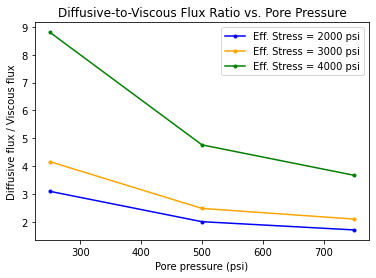

In [13]:
# for all eff stress 2000, 3000, 4000 psi

pp_line = np.array([250, 500, 750])
dif_to_visc2000 = k_eff2000 / popt[0]
dif_to_visc3000 = k_eff3000 / popt1[0]
dif_to_visc4000 = k_eff4000 / popt2[0]

p1 = plt.plot(pp_line, dif_to_visc2000, '.-', color='blue')
p2 = plt.plot(pp_line, dif_to_visc3000, '.-', color='orange')
p3 = plt.plot(pp_line, dif_to_visc4000, '.-', color='green')
plt.title('Diffusive-to-Viscous Flux Ratio vs. Pore Pressure')
plt.legend([p1[0], p2[0], p3[0]], ['Eff. Stress = 2000 psi', 'Eff. Stress = 3000 psi', 'Eff. Stress = 4000 psi'])
plt.xlabel('Pore pressure (psi)'); plt.ylabel('Diffusive flux / Viscous flux')
plt.show()

### B. Calculate mean free path (MFP) and Knudsen number

**B.1. Calculate MFP**

There is a typo in the equation in the handout. The correct one as follows:

$$\lambda=\frac{K_B T}{\sqrt{2} \cdot \pi d^2_m P_p}$$
<br>
$K_B$ Boltzmann constant in $(kg m^2 s^{-2} K^{-1})$, $T$ temperature in $K$, $d_m$ molecular diameter in $m$, $P_p$ pore pressure in $Pa$, so $\lambda$ the mean free path (MFP) is in $m$.

Mean free path at pore pressure 250 psi: 8.347212659951989 nm 



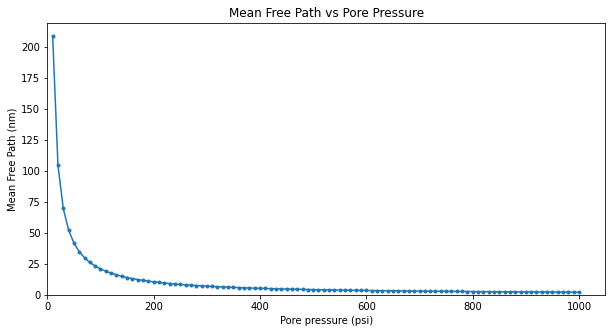

In [14]:
# knowns
K_B = 1.3806E-23 # unit consistent with above
temp = 40 + 273 # Celsius to K
d_m = 2.6E-10 # unit consistent with above
pressure_range = np.arange(10, 1010, 10) 
pressure_range_conv = pressure_range * 6894.76 # psi to Pa

pressure250 = 250 * 6894.76 # psi to Pa

# calculate MFP
mfp = (K_B * temp) / (np.sqrt(2) * np.pi * (d_m**2) * pressure_range_conv)
mfp250 = (K_B * temp) / (np.sqrt(2) * np.pi * (d_m**2) * pressure250)
print('Mean free path at pore pressure 250 psi:', mfp250 * 1E+09, 'nm \n')

# plot MFP vs pore pressure
plt.figure(figsize=(10,5))
plt.plot(pressure_range, mfp * 1E+09, '.-')
plt.title('Mean Free Path vs Pore Pressure')
plt.xlabel('Pore pressure (psi)'); plt.ylabel('Mean Free Path (nm)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.show()

**B.2. Calculate Knudsen Number and Determine the Flow Regime**

$$K_N=\frac{\lambda}{d_P}$$

$\lambda$ in unit $m$ is the mean free path (calculated previously), and $d_P$ in unit $m$ is the effective pore size (also calculated previously). $K_N$ is dimensionless. 

Criteria for $K_N$ for flow regime:

|Flow regime|Knudsen number|Driving force|
|:---:|:---:|:---:|
|Knudsen/free<br> molecule flow|Kn>10|Total concentration<br> gradient and<br> molecular weight|
|Transition flow|0.1<Kn<10|Mostly Knudsen<br> flow with some<br> Darcy flow|
|Slip flow|0.01<Kn<0.1|Mostly Darcy flow<br> with some<br> Knudsen flow|
|Continuum/Darcy/<br> Poiseuille flow|0.01>Kn|Total pressure<br> gradient|


In [15]:
knudsen = mfp250 / w

print('Knudsen number at effective pore size', np.round(w * 1E+09, 3), 'nm and gas mean free path', np.round(mfp250 * 1E+09, 3), 'nm at pressure', 250, 'psi is:', np.round(knudsen, 3))

# determine what flow regime
if knudsen > 10:
  print('Flow regime is: Knudsen flow')
if 0.1 < knudsen < 10:
  print('Flow regime is: Transition flow')
if 0.01 < knudsen < 0.1:
  print('Flow regime is: Slip flow')
if knudsen < 0.01:
  print('Flow regime is: Darcy flow')

Knudsen number at effective pore size 52.206 nm and gas mean free path 8.347 nm at pressure 250 psi is: 0.16
Flow regime is: Transition flow


In [16]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=Pc_min_Pp250, y=k_Pp250,
                    mode='lines+markers',
                    name='lines+markers'))
fig.show()